In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [138]:
#export
from PIL import Image, ImageFilter
from pathlib import Path
import mimetypes, os, imageio, PIL, inspect
from exp.nb_05 import *
from imgaug import augmenters as iaa
import imgaug as ia
import numpy as np

In [24]:
path=Path(r'E:\images\wallpaper')
c=L(path.iterdir())

In [120]:
c[2]

WindowsPath('E:/images/wallpaper/ana-de-armas-7360x4912-4k-8k-13655.jpg')

In [121]:
img=Image.open(c[2])
img.show()

In [122]:
img.height/15, img.width/15

(327.46666666666664, 490.6666666666667)

In [112]:
#export
def img_factor(img, factor=1, method=Image.BILINEAR):
    return img.resize((int(img.width*factor), int(img.height*factor)), method)

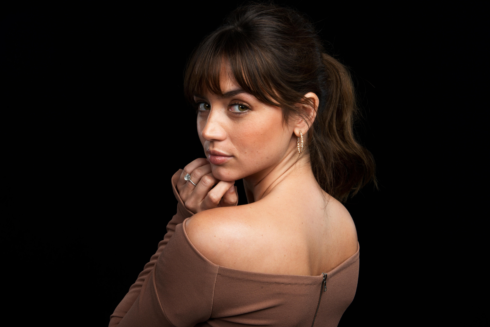

In [29]:
img_factor(img, 15, Image.BILINEAR)

In [38]:
#export
def show_image(im, figsize=(3,3)):
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(im)

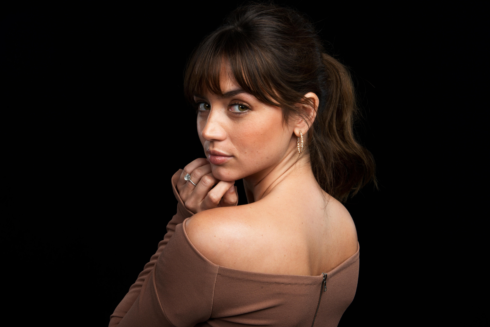

In [123]:
img_factor(img, 1/15)

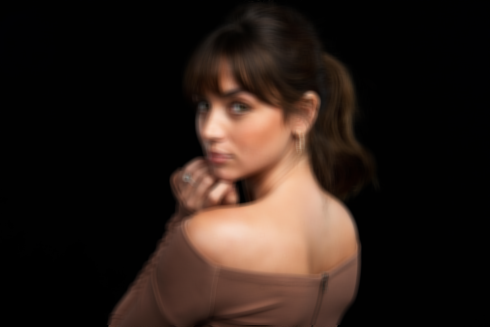

In [124]:
img_1=img_factor(img, 1/15).filter(ImageFilter.BLUR)
img_factor(img_1)

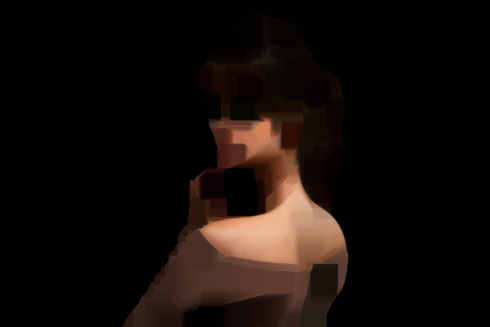

In [125]:
img_1=img_factor(img, 1/15).filter(ImageFilter.MinFilter(23))
img_factor(img_1)

In [238]:
path=Path(r'D:\git\dl\data\imagenette_160')
list(path.iterdir())

[WindowsPath('D:/git/dl/data/imagenette_160/train'),
 WindowsPath('D:/git/dl/data/imagenette_160/val')]

In [246]:
path_train=path/'train/n01440764'
train_path=L(path_train.iterdir())

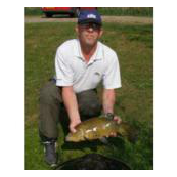

In [248]:
frog_img=train_path[0]
img=PIL.Image.open(frog_img)
show_image(img)

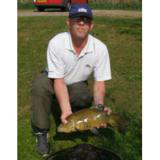

In [249]:
img

In [46]:
#export
image_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('image/'))

In [50]:
#export
Path.ls = lambda x: L(x.iterdir())

In [250]:
path_train.ls()

L (1300 items)
[WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10026.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10027.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10029.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10040.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10042.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10043.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10048.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10066.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10074.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_1009.JPEG')...]

In [251]:
#export
def setify(o): return o if isinstance(o,set) else set(listify(o))

In [53]:
test_eq(setify('aa'), {'aa'})
test_eq(setify(['aa',1]), {'aa',1})
test_eq(setify(None), set())
test_eq(setify(1), {1})
test_eq(setify({1}), {1})

In [173]:
#export
def _get_files(p, fs, extensions=None):
    p = Path(p) if not isinstance(p, Path) else p
    res = L((p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)))
    return res

In [252]:
t = [o.name for o in os.scandir(path_img)]
t = _get_files(path, t, extensions=image_extensions)
t

L (50000 items)
[WindowsPath('D:/git/dl/data/imagenette_160/0_frog.png'), WindowsPath('D:/git/dl/data/imagenette_160/10000_automobile.png'), WindowsPath('D:/git/dl/data/imagenette_160/10001_frog.png'), WindowsPath('D:/git/dl/data/imagenette_160/10002_frog.png'), WindowsPath('D:/git/dl/data/imagenette_160/10003_ship.png'), WindowsPath('D:/git/dl/data/imagenette_160/10004_ship.png'), WindowsPath('D:/git/dl/data/imagenette_160/10005_cat.png'), WindowsPath('D:/git/dl/data/imagenette_160/10006_deer.png'), WindowsPath('D:/git/dl/data/imagenette_160/10007_frog.png'), WindowsPath('D:/git/dl/data/imagenette_160/10008_airplane.png')...]

In [253]:
#export
def get_files(path, extensions=None, recurse=False, include=None):
    path = Path(path)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}
    if recurse:
        res = []
        for i,(p,d,f) in enumerate(os.walk(path)): # returns (dirpath, dirnames, filenames)
            if include is not None and i==0: d[:] = [o for o in d if o in include]
            else:                            d[:] = [o for o in d if not o.startswith('.')]
            res += _get_files(p, f, extensions)
        return L(res)
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, f, extensions)

In [254]:
get_files(path_img, image_extensions)

L (50000 items)
[WindowsPath('D:/git/dl/data/cifar/train/0_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10000_automobile.png'), WindowsPath('D:/git/dl/data/cifar/train/10001_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10002_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10003_ship.png'), WindowsPath('D:/git/dl/data/cifar/train/10004_ship.png'), WindowsPath('D:/git/dl/data/cifar/train/10005_cat.png'), WindowsPath('D:/git/dl/data/cifar/train/10006_deer.png'), WindowsPath('D:/git/dl/data/cifar/train/10007_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10008_airplane.png')...]

In [255]:
get_files(path_img, image_extensions, recurse=True)

L (50000 items)
[WindowsPath('D:/git/dl/data/cifar/train/0_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10000_automobile.png'), WindowsPath('D:/git/dl/data/cifar/train/10001_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10002_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10003_ship.png'), WindowsPath('D:/git/dl/data/cifar/train/10004_ship.png'), WindowsPath('D:/git/dl/data/cifar/train/10005_cat.png'), WindowsPath('D:/git/dl/data/cifar/train/10006_deer.png'), WindowsPath('D:/git/dl/data/cifar/train/10007_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10008_airplane.png')...]

In [141]:
path_hr=Path(r'E:\documents\papers')
doc_fol=get_files(path_hr,image_extensions)
import imageio

In [104]:
doc_fol[-1]

WindowsPath('E:/documents/papers/hroct_n.jpg')

Original:


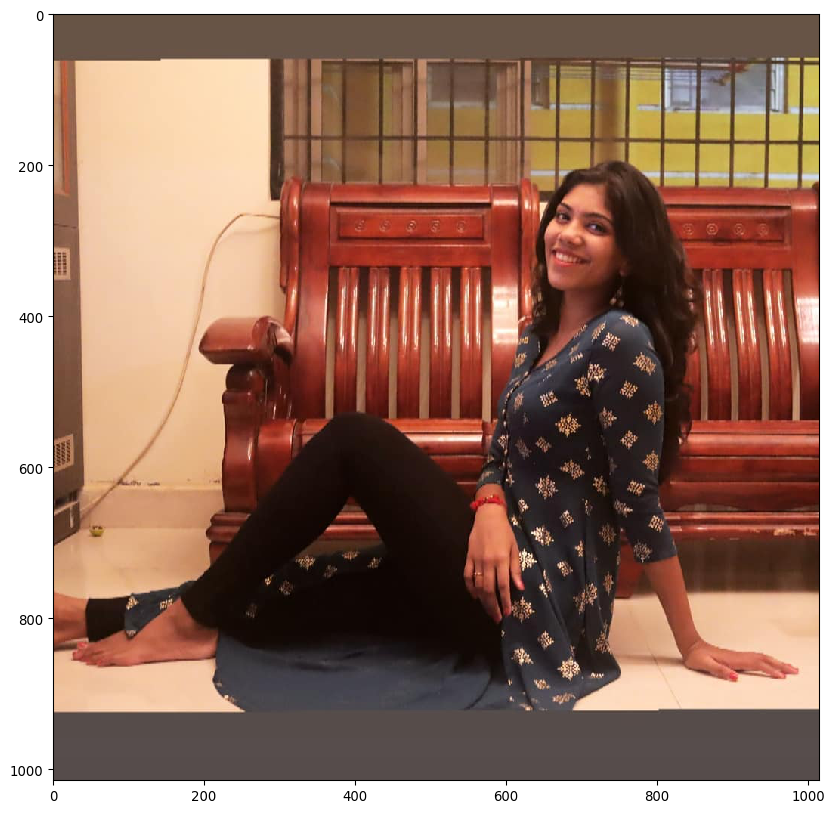

In [152]:
image = imageio.imread('https://instagram.fblr1-3.fna.fbcdn.net/vp/64cc81fca67a05f9ffda9793930d46f1/5E58FA91/t51.2885-15/e35/75538146_2103664023263229_2678085243821240235_n.jpg?_nc_ht=instagram.fblr1-3.fna.fbcdn.net&_nc_cat=109')

print("Original:")
ia.imshow(image)

Augmented:


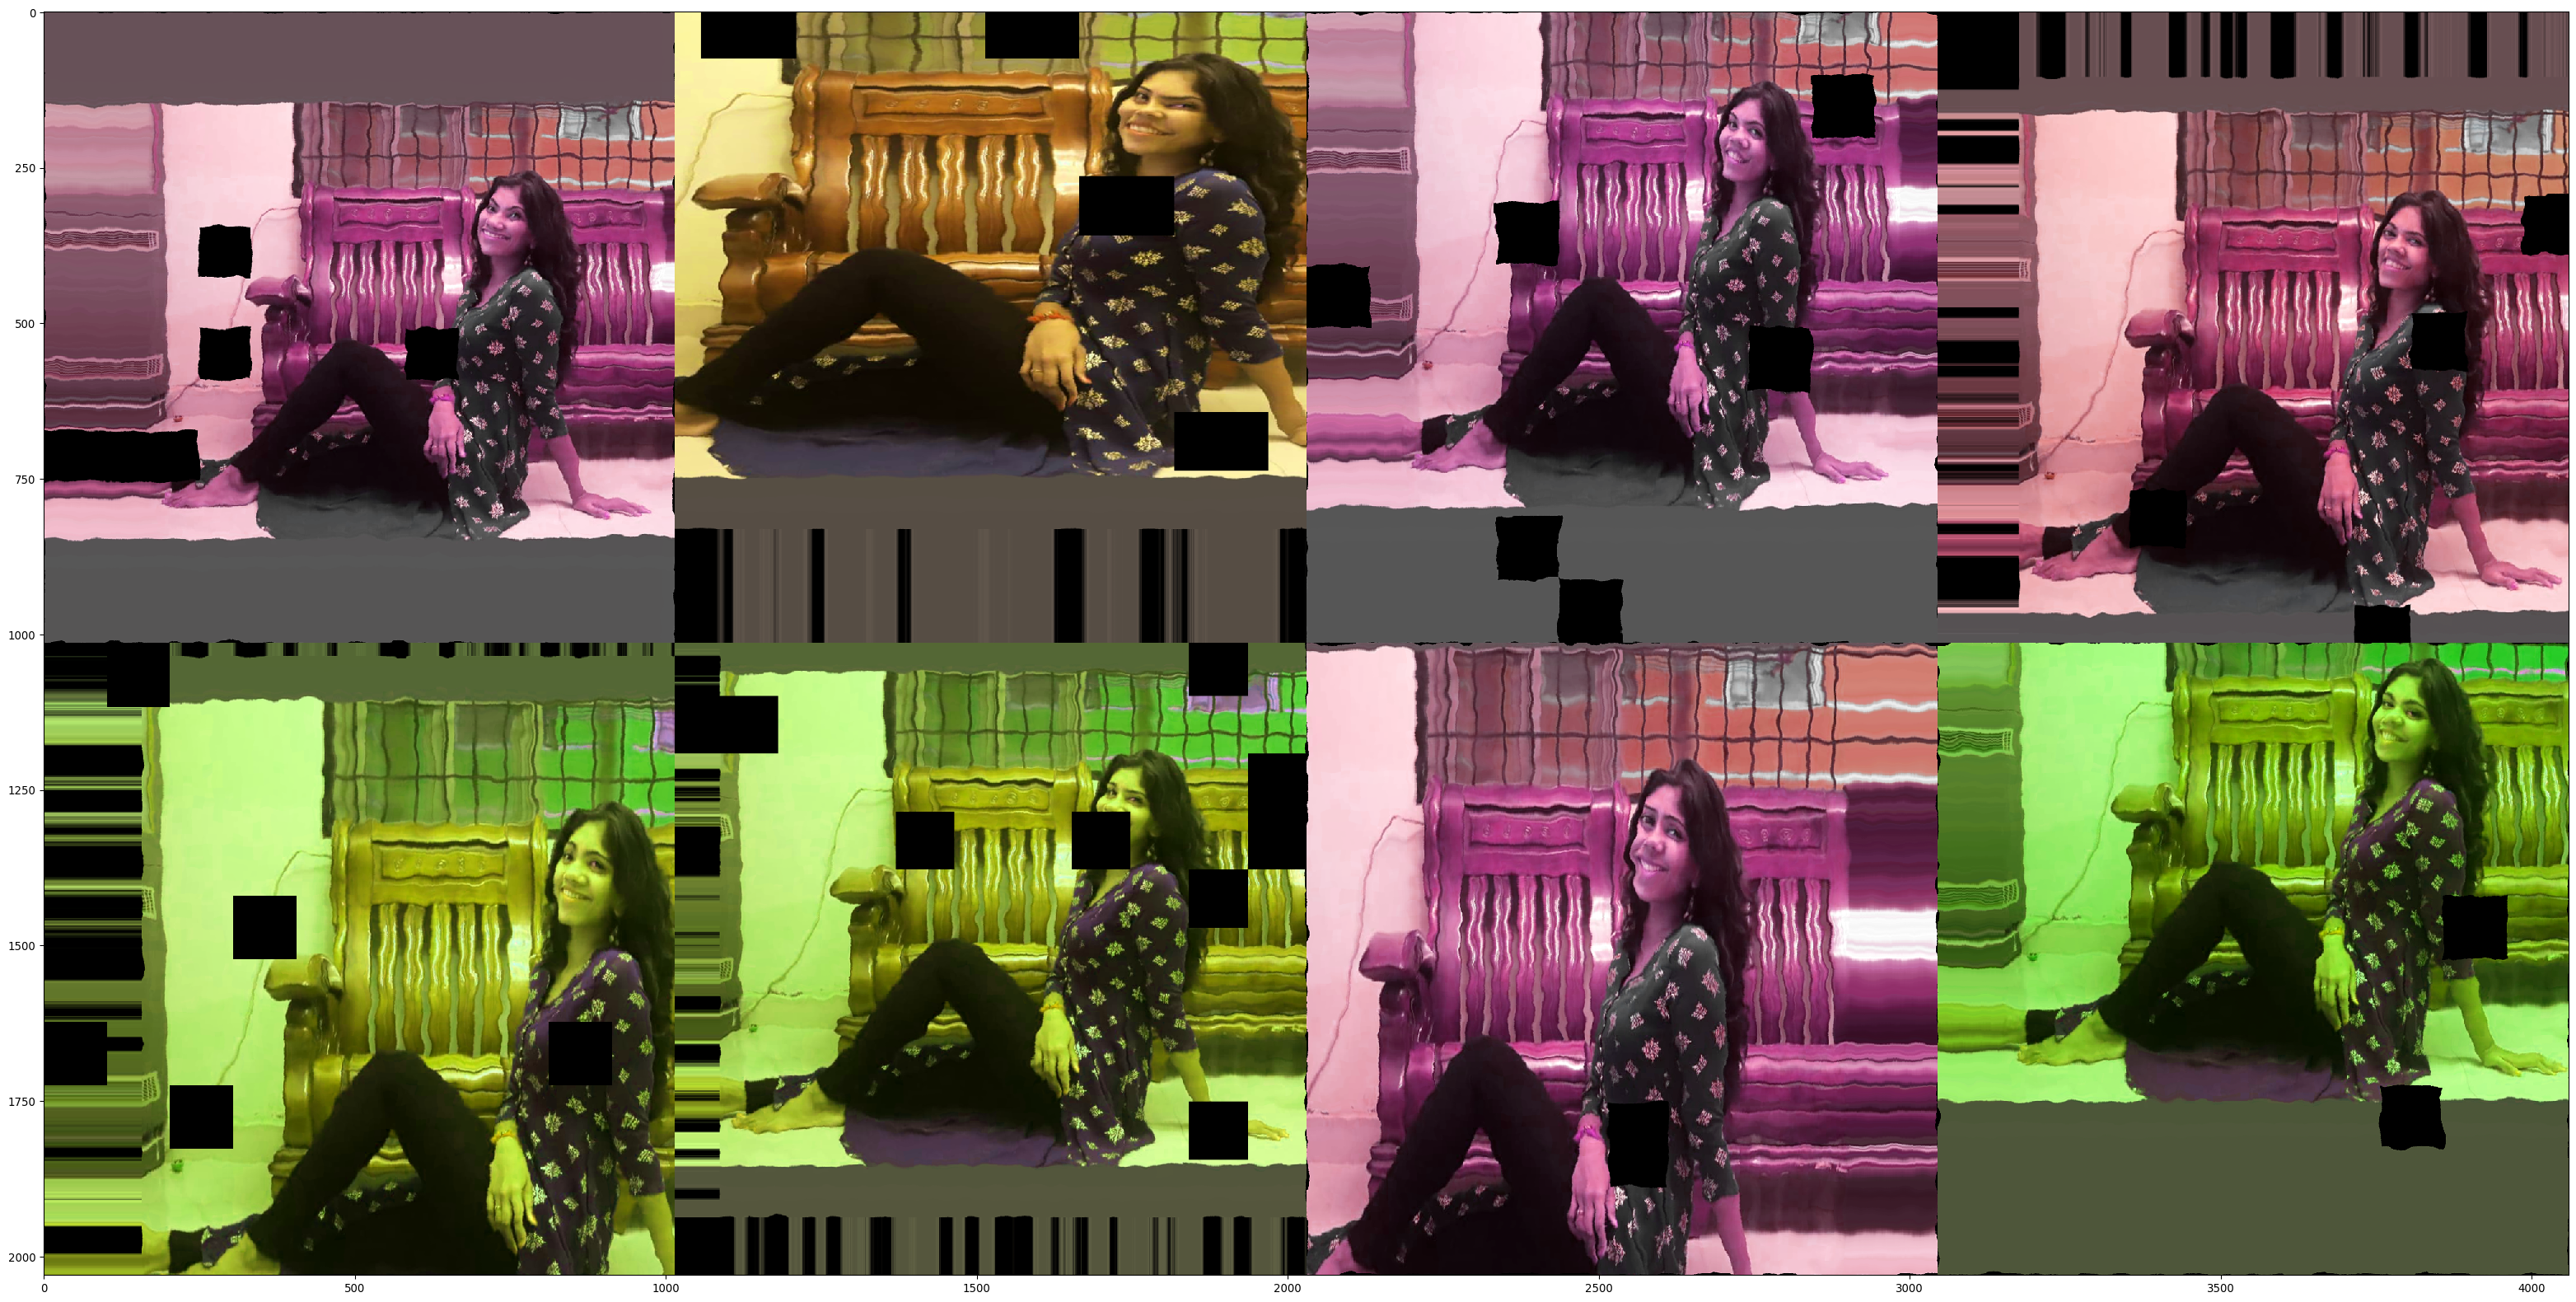

In [267]:
seq = iaa.Sequential([
    iaa.CropAndPad(percent=(-0.2, 0.2), pad_mode="edge"),  # crop and pad images
    iaa.AddToHueAndSaturation((-60, 60)),  # change their color
    iaa.ElasticTransformation(alpha=90, sigma=11),  # water-like effect
    iaa.CoarseDropout((0.01, 0.1), size_percent=0.01)  # set large image areas to zero
], random_order=True)

images_aug = np.array([seq.augment_image(image) for _ in range(8)])

print("Augmented:")
ia.imshow(ia.draw_grid(images_aug, cols=4, rows=2))

In [172]:
print(inspect.getsource(L))

class L():
    def __init__(self, items): self.items = listify(items)
    def __getitem__(self, idx):
        if isinstance(idx, (int,slice)): return self.items[idx]
        if isinstance(idx[0],bool):
            assert len(idx)==len(self) # bool mask
            return [o for m,o in zip(idx,self.items) if m]
        return [self.items[i] for i in idx]
    def __len__(self): return len(self.items)
    def __iter__(self): return iter(self.items)
    def __setitem__(self, i, o): self.items[i] = o
    def __delitem__(self, i): del(self.items[i])
    def __repr__(self):
        res = f'{self.__class__.__name__} ({len(self)} items)\n{self.items[:10]}'
        if len(self)>10: res = res[:-1]+ '...]'
        return res



In [190]:
#export
class L():
    def __init__(self, items): self.items = listify(items)
    def __getitem__(self, idx):
        if isinstance(idx, (int,slice)): return self.items[idx]
        if isinstance(idx[0],bool):
            assert len(idx)==len(self) # bool mask
            return [o for m,o in zip(idx,self.items) if m]
        return [self.items[i] for i in idx]
    def __len__(self): return len(self.items)
    def __iter__(self): return iter(self.items)
    def __setitem__(self, i, o): self.items[i] = o
    def __delitem__(self, i): del(self.items[i])
    def __repr__(self):
        res = f'{self.__class__.__name__} ({len(self)} items)\n{self.items[:10]}'
        if len(self)>10: res = res[:-1]+ '...]'
        return res
    def __add__ (a,b): return a._new(a.items+_listify(b))

In [272]:
all_fns = get_files(path, image_extensions, recurse=True)
all_fns

L (13394 items)
[WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10026.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10027.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10029.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10040.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10042.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10043.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10048.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10066.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10074.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_1009.JPEG')...]

In [273]:
%timeit -n 10 get_files(path, image_extensions, recurse=True)

215 ms ± 4.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [271]:
#export
def compose(x, funcs, *args, order_key='_order', **kwargs):
    key = lambda o: getattr(o, order_key, 0)
    for f in sorted(listify(funcs), key=key): x = f(x, **kwargs)
    return x

class ItemList(L):
    def __init__(self, items, path='.', tfms=None):
        super().__init__(items)
        self.path,self.tfms = Path(path),tfms

    def __repr__(self): return f'{super().__repr__()}\nPath: {self.path}'
    
    def new(self, items, cls=None):
        if cls is None: cls=self.__class__
        return cls(items, self.path, tfms=self.tfms)
    
    def  get(self, i): return i
    def _get(self, i): return compose(self.get(i), self.tfms)
    
    def __getitem__(self, idx):
        res = super().__getitem__(idx)
        if isinstance(res,list): return [self._get(o) for o in res]
        return self._get(res)

class ImageList(ItemList):
    @classmethod
    def from_files(cls, path, extensions=None, recurse=True, include=None, **kwargs):
        if extensions is None: extensions = image_extensions
        return cls(get_files(path, extensions, recurse=recurse, include=include), path, **kwargs)
    
    def get(self, fn): return PIL.Image.open(fn)

In [197]:
#export
class Transform(): _order=0

class MakeRGB(Transform):
    def __call__(self, item): return item.convert('RGB')

def make_rgb(item): return item.convert('RGB')

In [274]:
il = ImageList.from_files(path, tfms=make_rgb)
il

ImageList (13394 items)
[WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10026.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10027.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10029.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10040.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10042.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10043.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10048.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10066.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10074.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_1009.JPEG')...]
Path: D:\git\dl\data\imagenette_160

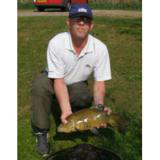

In [275]:
img = il[0]; img

In [276]:
#export
class ResizeFixed(Transform):
    _order=10
    def __init__(self,size):
        if isinstance(size,int): size=(size,size)
        self.size = size
        
    def __call__(self, item): return item.resize(self.size, PIL.Image.BILINEAR)

def to_byte_tensor(item):
    res = torch.ByteTensor(torch.ByteStorage.from_buffer(item.tobytes()))
    w,h = item.size
    return res.view(h,w,-1).permute(2,0,1)
to_byte_tensor._order=20

def to_float_tensor(item): return item.float().div_(255.)
to_float_tensor._order=30

In [277]:
#export
def grandparent_splitter(fn, valid_name='test', train_name='train'):
    gp = fn.parent.parent.name
    return True if gp==valid_name else False if gp==train_name else None

def split_by_func(items, f):
    mask = [f(o) for o in items]
    # `None` values will be filtered out
    f = [o for o,m in zip(items,mask) if m==False]
    t = [o for o,m in zip(items,mask) if m==True ]
    return f,t

In [281]:
splitter = partial(grandparent_splitter, valid_name='val')

In [282]:
%time train,valid = split_by_func(il, splitter)

Wall time: 95.8 ms


In [283]:
len(train), len(valid)

(12894, 500)

In [289]:
n=path/'val'

In [290]:
#export
class SplitData():
    def __init__(self, train, valid): self.train,self.valid = train,valid
        
    def __getattr__(self,k): return getattr(self.train,k)
    #This is needed if we want to pickle SplitData and be able to load it back without recursion errors
    def __setstate__(self,data:Any): self.__dict__.update(data) 
    
    @classmethod
    def split_by_func(cls, il, f):
        lists = map(il.new, split_by_func(il.items, f))
        return cls(*lists)

    def __repr__(self): return f'{self.__class__.__name__}\nTrain: {self.train}\nValid: {self.valid}\n'

In [291]:
sd = SplitData.split_by_func(il, splitter); sd

SplitData
Train: ImageList (12894 items)
[WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10026.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10027.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10029.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10040.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10042.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10043.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10048.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10066.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10074.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_1009.JPEG')...]
Path: D:\git\dl\data\imagenette_160
Valid: ImageList (500 items)
[WindowsPath('D:/git/dl/data/imagenette_160/val/n01440764/ILS

In [292]:
#export
from collections import OrderedDict

def uniqueify(x, sort=False):
    res = list(OrderedDict.fromkeys(x).keys())
    if sort: res.sort()
    return res

In [293]:
#export
class Processor(): 
    def process(self, items): return items

class CategoryProcessor(Processor):
    def __init__(self): self.vocab=None
    
    def __call__(self, items):
        #The vocab is defined on the first use.
        if self.vocab is None:
            self.vocab = uniqueify(items)
            self.otoi  = {v:k for k,v in enumerate(self.vocab)}
        return [self.proc1(o) for o in items]
    def proc1(self, item):  return self.otoi[item]
    
    def deprocess(self, idxs):
        assert self.vocab is not None
        return [self.deproc1(idx) for idx in idxs]
    def deproc1(self, idx): return self.vocab[idx]

In [294]:
#export
def parent_labeler(fn): return fn.parent.name

def _label_by_func(ds, f, cls=ItemList): return cls([f(o) for o in ds.items], path=ds.path)

#This is a slightly different from what was seen during the lesson,
#   we'll discuss the changes in lesson 11
class LabeledData():
    def process(self, il, proc): return il.new(compose(il.items, proc))

    def __init__(self, x, y, proc_x=None, proc_y=None):
        self.x,self.y = self.process(x, proc_x),self.process(y, proc_y)
        self.proc_x,self.proc_y = proc_x,proc_y
        
    def __repr__(self): return f'{self.__class__.__name__}\nx: {self.x}\ny: {self.y}\n'
    def __getitem__(self,idx): return self.x[idx],self.y[idx]
    def __len__(self): return len(self.x)
    
    def x_obj(self, idx): return self.obj(self.x, idx, self.proc_x)
    def y_obj(self, idx): return self.obj(self.y, idx, self.proc_y)
    
    def obj(self, items, idx, procs):
        isint = isinstance(idx, int) or (isinstance(idx,torch.LongTensor) and not idx.ndim)
        item = items[idx]
        for proc in reversed(listify(procs)):
            item = proc.deproc1(item) if isint else proc.deprocess(item)
        return item

    @classmethod
    def label_by_func(cls, il, f, proc_x=None, proc_y=None):
        return cls(il, _label_by_func(il, f), proc_x=proc_x, proc_y=proc_y)

def label_by_func(sd, f, proc_x=None, proc_y=None):
    train = LabeledData.label_by_func(sd.train, f, proc_x=proc_x, proc_y=proc_y)
    valid = LabeledData.label_by_func(sd.valid, f, proc_x=proc_x, proc_y=proc_y)
    return SplitData(train,valid)

In [295]:
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor())

In [297]:
ll.train

LabeledData
x: ImageList (12894 items)
[WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10026.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10027.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10029.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10040.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10042.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10043.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10048.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10066.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10074.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_1009.JPEG')...]
Path: D:\git\dl\data\imagenette_160
y: ItemList (12894 items)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0...]
Path: D:\git\dl\data\imagenette_

In [298]:
assert ll.train.proc_y is ll.valid.proc_y

In [300]:
ll.train.y.items[0], ll.train.y_obj(0), ll.train.y_obj(slice(2))

(0, 'n01440764', ['n01440764', 'n01440764'])

In [301]:
ll

SplitData
Train: LabeledData
x: ImageList (12894 items)
[WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10026.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10027.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10029.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10040.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10042.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10043.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10048.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10066.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_10074.JPEG'), WindowsPath('D:/git/dl/data/imagenette_160/train/n01440764/n01440764_1009.JPEG')...]
Path: D:\git\dl\data\imagenette_160
y: ItemList (12894 items)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0...]
Path: D:\git\dl

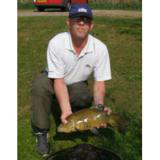

In [302]:
ll.train[0][0]

In [314]:
tfms = [make_rgb, ResizeFixed(160), to_byte_tensor, to_float_tensor]

il = ImageList.from_files(path, tfms=tfms)
sd = SplitData.split_by_func(il, splitter)
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor())

In [315]:
#export
def show_image(im, figsize=(3,3)):
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(im.permute(1,2,0))

In [316]:
x,y = ll.train[0]
x.shape

torch.Size([3, 160, 160])

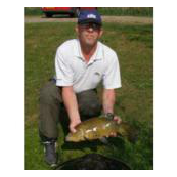

In [317]:
show_image(x)

In [318]:
bs=16

In [325]:
train_dl,valid_dl = get_dls(ll.train,ll.valid,bs)

In [326]:
x,y = next(iter(train_dl))

In [327]:
x.shape

torch.Size([16, 3, 160, 160])

'n03394916'

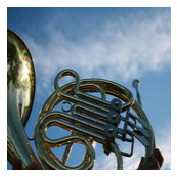

In [328]:
show_image(x[0])
ll.train.proc_y.vocab[y[0]]

In [329]:
#export
class DataBunch():
    def __init__(self, train_dl, valid_dl, c_in=None, c_out=None):
        self.train_dl,self.valid_dl,self.c_in,self.c_out = train_dl,valid_dl,c_in,c_out

    @property
    def train_ds(self): return self.train_dl.dataset

    @property
    def valid_ds(self): return self.valid_dl.dataset

In [330]:
#export
def databunchify(sd, bs, c_in=None, c_out=None, **kwargs):
    dls = get_dls(sd.train, sd.valid, bs, **kwargs)
    return DataBunch(*dls, c_in=c_in, c_out=c_out)

SplitData.to_databunch = databunchify

In [332]:
#path = datasets.untar_data(datasets.URLs.IMAGENETTE_160)
tfms = [make_rgb, ResizeFixed(160), to_byte_tensor, to_float_tensor]

il = ImageList.from_files(path, tfms=tfms)
sd = SplitData.split_by_func(il, partial(grandparent_splitter, valid_name='val'))
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor())
data = ll.to_databunch(bs, c_in=3, c_out=10)

In [333]:
cbfs = [partial(AvgStatsCallback,accuracy),
        CudaCallback]

In [334]:
m,s = x.mean((0,2,3)).cuda(),x.std((0,2,3)).cuda()
m,s

(tensor([0.4397, 0.4661, 0.4524], device='cuda:0'),
 tensor([0.2839, 0.2861, 0.3307], device='cuda:0'))

In [335]:
#export
def normalize_chan(x, mean, std):
    return (x-mean[...,None,None]) / std[...,None,None]

_m = tensor([0.47, 0.48, 0.45])
_s = tensor([0.29, 0.28, 0.30])
norm_imagenette = partial(normalize_chan, mean=_m.cuda(), std=_s.cuda())

In [336]:
cbfs.append(partial(BatchTransformXCallback, norm_imagenette))

In [337]:
nfs = [64,64,128,256]

In [338]:
#export
import math
def prev_pow_2(x): return 2**math.floor(math.log2(x))

def get_cnn_layers(data, nfs, layer, **kwargs):
    def f(ni, nf, stride=2): return layer(ni, nf, 3, stride=stride, **kwargs)
    l1 = data.c_in
    l2 = prev_pow_2(l1*3*3)
    layers =  [f(l1  , l2  , stride=1),
               f(l2  , l2*2, stride=2),
               f(l2*2, l2*4, stride=2)]
    nfs = [l2*4] + nfs
    layers += [f(nfs[i], nfs[i+1]) for i in range(len(nfs)-1)]
    layers += [nn.AdaptiveAvgPool2d(1), Lambda(flatten), 
               nn.Linear(nfs[-1], data.c_out)]
    return layers

def get_cnn_model(data, nfs, layer, **kwargs):
    return nn.Sequential(*get_cnn_layers(data, nfs, layer, **kwargs))

def get_learn_run(nfs, data, lr, layer, cbs=None, opt_func=None, **kwargs):
    model = get_cnn_model(data, nfs, layer, **kwargs)
    init_cnn(model)
    return get_runner(model, data, lr=lr, cbs=cbs, opt_func=opt_func)

In [342]:
sched = combine_scheds([0.3,0.7], [sched_cos(0.1,0.3), sched_cos(0.3, 0.05)])

In [343]:
learn,run = get_learn_run(nfs, data, 0.2, conv_layer, cbs=cbfs+[
    partial(ParamScheduler, 'lr', sched)
])

In [344]:
#export
def model_summary(run, learn, data, find_all=False):
    xb,yb = get_batch(data.valid_dl, run)
    device = next(learn.model.parameters()).device#Model may not be on the GPU yet
    xb,yb = xb.to(device),yb.to(device)
    mods = find_modules(learn.model, is_lin_layer) if find_all else learn.model.children()
    f = lambda hook,mod,inp,out: print(f"{mod}\n{out.shape}\n")
    with Hooks(mods, f) as hooks: learn.model(xb)

In [345]:
model_summary(run, learn, data)

NameError: name 'get_batch' is not defined

In [346]:
%time run.fit(1, learn)

train: [1.7163984944547852, tensor(0.4152, device='cuda:0')]
valid: [1.12142529296875, tensor(0.6300, device='cuda:0')]
Wall time: 4min 8s


In [347]:
!python notebook2script.py 06_augmentation.ipynb

Converted 06_augmentation.ipynb to exp\nb_06.py
